Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "VARSHA ERANKI"

---

# Homework 2 (UMD, CL1, Fall 2019)

This programming assigning is to familiarize you with:

- Co-occurance-based semantics
- Word embeddings and dimensionality reduction
- Linear classification
- Deep learning models with embedding inputs

The document is rather long; we encourage you to take one part at a time, rather than trying to do it all at once. If you run into any issues, please reach out to teaching staff. Please remember that homework assignments (including the programming aspects) are to be completed individually; refer to [Class Policies](https://github.com/hal3/cl1f19umd#class-policies) for more details.

Credits: Some of this assignment is based on a [similar homework assignment]() at Stanford; many thanks to them for making this available!!!

# Word Vectors

Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore two types of word vectors: those derived from co-occurrence matrices, and those derived via word2vec.

**Assignment Notes:** Please make sure to save the notebook as you go along.

**Note on Terminology:** The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As [Wikipedia] states, "conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension".

[Wikipedia]: https://en.wikipedia.org/wiki/Word_embedding

# Part 1: Count-Based Word Vectors (10 points)

Most word vector models start from the following idea:

You shall know a word by the company it keeps ([Firth, J. R. 1957:11])

Many word vector implementations are driven by the idea that similar words, i.e., (near) synonyms, will be used in similar contexts. As a result, similar words will often be spoken or written along with a shared subset of words, i.e., contexts. By examining these contexts, we can try to develop embeddings for our words. With this intuition in mind, many "old school" approaches to constructing word vectors relied on word counts. Here we elaborate upon one of those strategies, co-occurrence matrices (for more information, see [here1] or [here2]).

[Firth, J. R. 1957:11]:https://en.wikipedia.org/wiki/John_Rupert_Firth
[here1]:http://web.stanford.edu/class/cs124/lec/vectorsemantics.video.pdf
[here2]:https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285

# Co-Occurrence

A co-occurrence matrix counts how often things co-occur in some environment. Given some word  $w_i$ occurring in the document, we consider the context window surrounding  $w_i$. Supposing our fixed window size is  $n$, then this is the  n preceding and  n subsequent words in that document, i.e. words  $w_{i−n} \dots w_{i−1}$ and  $w_{i+1} \dots w_{i+n}$. We build a co-occurrence matrix  $M$, which is a symmetric word-by-word matrix in which  $M_{ij}$ is the number of times  $w_{j}$ appears inside  $w_{i}$'s window.

Example: Co-Occurrence with Fixed Window of n=1:

Document 1: "all that glitters is not gold"

Document 2: "all is well that ends well"

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table>
<thead><tr>
<th>*</th>
<th>START</th>
<th>all</th>
<th>that</th>
<th>glitters</th>
<th>is</th>
<th>not</th>
<th>gold</th>
<th>well</th>
<th>ends</th>
<th>END</th>
</tr>
</thead>
<tbody>
<tr>
<td>START</td>
<td>0</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>all</td>
<td>2</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>that</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>glitters</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>is</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>not</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>gold</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>well</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>ends</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>END</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody>
</table>

Note: In NLP, we often add START and END tokens to represent the beginning and end of sentences, paragraphs or documents. In thise case we imagine START and END tokens encapsulating each document, e.g., "START All that glitters is not gold END", and include these tokens in our co-occurrence counts.

The rows (or columns) of this matrix provide one type of word vectors (those based on word-word co-occurrence), but the vectors will be large in general (linear in the number of distinct words in a corpus). Thus, our next step is to run dimensionality reduction. In particular, we will run SVD (Singular Value Decomposition), which is a kind of generalized PCA (Principal Components Analysis) to select the top  $k$ principal components. Here's a visualization of dimensionality reduction with SVD. In this picture our co-occurrence matrix is  $A$ with  $n$ rows corresponding to $n$ words. We obtain a full matrix decomposition, with the singular values ordered in the diagonal  $S$ matrix, and our new, shorter length-$k$ word vectors in  $U_k$.


This reduced-dimensionality co-occurrence representation preserves semantic relationships between words, e.g. doctor and hospital will be closer than doctor and dog.

Notes: If you can barely remember what an eigenvalue is, here's [a slow, friendly introduction to SVD]. If you want to learn more thoroughly about PCA or SVD, feel free to check out lectures [7], [8], and [9] of CS168. These course notes provide a great high-level treatment of these general purpose algorithms. Though, for the purpose of this class, you only need to know how to extract the k-dimensional embeddings by utilizing pre-programmed implementations of these algorithms from the numpy, scipy, or sklearn python packages. In practice, it is challenging to apply full SVD to large corpora because of the memory needed to perform PCA or SVD. However, if you only want the top  $k$ vector components for relatively small  $k$  — known as [Truncated SVD] — then there are reasonably scalable techniques to compute those iteratively.

[Truncated SVD]: https://en.wikipedia.org/wiki/Singular_value_decomposition#Truncated_SVD
[a slow, friendly introduction to SVD]: https://davetang.org/file/Singular_Value_Decomposition_Tutorial.pdf
[7]:https://web.stanford.edu/class/cs168/l/l7.pdf
[8]:http://theory.stanford.edu/~tim/s15/l/l8.pdf
[9]:https://web.stanford.edu/class/cs168/l/l9.pdf

# Plotting Co-Occurrence Word Embeddings

Here, we will be using the SemEval 2018 Task 2: Multilingual Emoji Prediction. If you haven't run the import cell at the top of this page, please run it now (click it and press SHIFT-RETURN). The corpus consists of 50,000 english tweets and 10,000 spanish tweets. These tweets span 20 categories and are split into train and test. For more details, please see https://www.aclweb.org/anthology/S18-1003. 

The data for the task consists of a list of tweets associated with a given emoji (i.e. label). The dataset includes tweets that contain one and only one emoji, of the 20 most frequent emojis. We provide a get_data function below that pulls all of the text from the tweets exclduing the emjoi.

Let's have a look what these documents are like….

In [2]:
import sys
import csv
#import random
from collections import Counter
from collections import defaultdict

us_emojis = {}
es_emojis = {}
f = open("mapping/us_mapping.txt", encoding='utf-8')
c = csv.reader(f)
for i in c:
    line = i[0].split('\t')
    us_emojis[int(line[0])] = line[1] 
f.close()
f = open("mapping/es_mapping.txt", encoding='utf-8')
c = csv.reader(f)
for i in c:
    line = i[0].split('\t')
    es_emojis[int(line[0])] = line[1] 
f.close()  

def readin(data, lan):
    count = 0
    f_txt = open("trial/"+lan+"_trial.text", encoding='utf-8')
    c_txt = csv.reader(f_txt)
    f_label = open("trial/"+lan+"_trial.labels", encoding='utf-8')
    c_label = csv.reader(f_label)
    for label, txt in zip(c_label,c_txt):
        data[int(label[0])].append(''.join(txt))
        count += 1
    f_txt.close()
    f_label.close()
    f_txt = open("test/"+lan+"_test.text", encoding='utf-8')
    c_txt = csv.reader(f_txt)
    f_label = open("test/"+lan+"_test.labels", encoding='utf-8')
    c_label = csv.reader(f_label)
    for label, txt in zip(c_label,c_txt):
        data[int(label[0])].append(''.join(txt))
        count += 1
    f_txt.close()
    f_label.close()
    return count

def process(data, count, TRAIN, DEV, TEST):
    train, dev, test = [],[],[]
    # count distribution
    dist = {}
    for l in data:
        dist[l] = round(len(data[l])/count,2)
        dist[l] = 0.05
    # extract train dev test
    for label in data:
        num = 0
        
        #data[label].sort()
        
        add = int(dist[label]*TRAIN)
        for i in range(num, num+add):
            train.append((data[label][i].lower().split(' '), label))
        num += add
        add = int(dist[label]*DEV)
        for i in range(num, num+add):
            dev.append((data[label][i].lower().split(' '), label))
        num += add
        add = int(dist[label]*TEST)
        for i in range(num, num+add):
            test.append((data[label][i].lower().split(' '), label))
    return train, dev, test

def get_data():
    WANT = 5000
    TRAIN = WANT*0.8
    DEV = WANT*0.1
    TEST = WANT*0.1
    us_data = defaultdict(list)
    us_count = readin(us_data, 'us')
    us_train, us_dev, us_test = process(us_data, us_count, TRAIN, DEV, TEST)
    
    WANT = 1000
    TRAIN = WANT*0.8
    DEV = WANT*0.1
    TEST = WANT*0.1
    es_data = defaultdict(list)
    es_count = readin(es_data, 'es')
    es_train, es_dev, es_test = process(es_data, es_count, TRAIN, DEV, TEST)
    corpus = us_train + us_dev + us_test
    corpus = [tweet[0] for tweet in corpus]
    return corpus

In [3]:
import pprint
corpus = get_data()
pprint.pprint(corpus[:1], compact=True, width=100)

[['a', 'little', 'throwback', 'with', 'my', 'favourite', 'person', '@', 'water', 'wall']]


**For the first record we see that the tweet is**

In [4]:
print(f'Tweet: {corpus[0]}')

Tweet: ['a', 'little', 'throwback', 'with', 'my', 'favourite', 'person', '@', 'water', 'wall']


# Question 1.1: Implement distinct_words [code] (2 points)

Write a method to work out the distinct words (for both **english only**) that occur in the corpus. You can do this with for loops, but it's more efficient to do it with Python list comprehensions. In particular, [this] may be useful to flatten a list of lists. If you're not familiar with Python list comprehensions in general, here's [more information].

You may find it useful to use [Python sets] to remove duplicate words.

[Python sets]:https://www.w3schools.com/python/python_sets.asp
[more information]: https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html
[this]: https://coderwall.com/p/rcmaea/flatten-a-list-of-lists-in-one-line-in-python

In [5]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    num_corpus_words = -1
    
    # YOUR CODE HERE
    
    for i in corpus:
        for j in i:
            corpus_words.append(j)
            
    corpus_words = set(corpus_words)
    
    corpus_words = sorted(list(corpus_words))
    
    num_corpus_words = len(corpus_words)
    
    #raise NotImplementedError()

    return corpus_words, num_corpus_words

In [6]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# ---------------------

from unittest import TestCase
test_case = TestCase()

# Define toy corpus
corpus = [['@', 'blessed', 'trendz'],
          ['always', 'a', 'good', 'time', 'with', 'these', 'friends'],
          ['#summer', '#2k17', 'single', 'released']]

        
test_corpus_words, num_corpus_words = distinct_words(corpus)

# Correct answers
ans_test_corpus_words = sorted(list(set(['#2k17','#summer', '@','a','always','blessed','friends','good','released','single','these','time','trendz','with'])))
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
test_case.assertEqual(num_corpus_words,ans_num_corpus_words, "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words))

# Test correct words
test_case.assertListEqual(test_corpus_words, ans_test_corpus_words, "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words)))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [7]:
# More hidden test cases are included in this cell


# Question 1.2: Implement compute_co_occurrence_matrix [code] (3 points)

Write a method that constructs a co-occurrence matrix for a certain window-size  $n$ (with a default of 8), considering words  $n$ before and $n$ after the word in the center of the window. Here, we start to use numpy (np) to represent vectors, matrices, and tensors. If you're not familiar with NumPy, there's a NumPy tutorial in the second half of this cs231n [Python NumPy tutorial].

[Python NumPy tutorial]: http://cs231n.github.io/python-numpy-tutorial/

In [8]:
import numpy as np

def compute_co_occurrence_matrix(corpus, window_size=8):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 8).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "START All that glitters is not gold END" with window size of 4,
              "All" will co-occur with "START", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2Ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """    
    words, num_words = distinct_words(corpus)
    M = None
    word2Ind = {}
    
    # YOUR CODE HERE
    
    indexes = [x for x in range(0,len(words))]
    word2Ind = dict(zip(words,indexes))
    
    M = np.zeros((num_words,num_words))
    
    for text in corpus:
        len_txt = len(text)
        
        for j in range(0,len_txt):
            mid_index = word2Ind[text[j]]
            
            for k in range(j-window_size,j+window_size+1):
                
                if k>=0 and k<len_txt and k!=j:
                        last_index = word2Ind[text[k]]
                        M[mid_index,last_index] += 1.0
    
    
    #raise NotImplementedError()

    return M, word2Ind

In [9]:
# ---------------------
# Run this sanity check
# Note that this is not an
# ---------------------

from unittest import TestCase
test_case = TestCase()

# Define toy corpus and get student's co-occurrence matrix
#test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
corpus = [['@', 'blessed', 'trendz'],
          ['always', 'a', 'good', 'time', 'with', 'these', 'friends'],
          ['#summer', '#2k17', 'single', 'released']]

M_test, word2Ind_test = compute_co_occurrence_matrix(corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array(
      [[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

word2Ind_ans = {'#2k17': 0, '#summer': 1, '@': 2, 'a': 3, 'always': 4, 'blessed': 5, 'friends': 6, 'good': 7, 'released': 8, 'single': 9, 'these': 10, 'time': 11, 'trendz': 12, 'with': 13}

# Test correct word2Ind
test_case.assertTrue((word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test))

# Test correct M shape
test_case.assertTrue((M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape))

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))
            
# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [10]:
# More hidden test cases are included in this cell


# Question 1.3: Implement reduce_to_k_dim [code] (1 point)

Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings. Use SVD to take the top k components and produce a new matrix of k-dimensional embeddings.

**Note**: All of numpy, scipy, and scikit-learn (sklearn) provide some implementation of SVD, but only scipy and sklearn provide an implementation of Truncated SVD, and only sklearn provides an efficient randomized algorithm for calculating large-scale Truncated SVD. So please use [sklearn.decomposition.TruncatedSVD].

[sklearn.decomposition.TruncatedSVD]: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [11]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # YOUR CODE HERE
    
    svd = TruncatedSVD(n_components = k, n_iter = 10, random_state = 0)
   
    M_reduced = svd.fit_transform(M)
   
    #raise NotImplementedError()

    print("Done.")
    return M_reduced

In [12]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

from unittest import TestCase
test_case = TestCase()

# Define toy corpus and run student code
#test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
corpus = [['@', 'blessed', 'trendz'],
          ['always', 'a', 'good', 'time', 'with', 'these', 'friends'],
          ['#summer', '#2k17', 'single', 'released']]

M_test, word2Ind_test = compute_co_occurrence_matrix(corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
test_case.assertTrue((M_test_reduced.shape[0] == 14), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 14))
test_case.assertTrue((M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 14 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [13]:
# More hidden test cases are included in this cell


# Question 1.4: Implement plot_embeddings [code] (1 point)

Here you will write a function to plot a set of 2D vectors in 2D space. For graphs, we will use Matplotlib (plt).

For this example, you may find it useful to adapt [this code]. In the future, a good way to make a plot is to look at the [Matplotlib gallery], find a plot that looks somewhat like what you want, and adapt the code they give.

[this code]:https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/
[Matplotlib gallery]: https://matplotlib.org/gallery/index.html


In [14]:
from matplotlib import pyplot as plt

def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , k)): matrix of k-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # YOUR CODE HERE
    
    for i,type in enumerate(words):
        x_coor,y_coor = M_reduced[word2Ind[type]][0],M_reduced[word2Ind[type]][1]
        
        plt.scatter(x_coor, y_coor, marker='*', color='red')
        plt.text(x_coor+0.05, y_coor+0.05, type, fontsize=12)
   
    plt.show()
    
    #raise NotImplementedError()

--------------------------------------------------------------------------------
Outputted Plot:


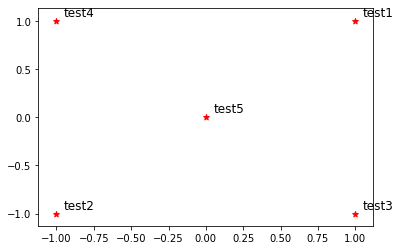

--------------------------------------------------------------------------------


In [15]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

print ("-" * 80)

# Question 1.5: Co-Occurrence Plot Analysis [written] (3 points)

Now we will put together all the parts you have written! We will compute the co-occurrence matrix with fixed window of 4, over the  SemEval 2018 Task 2: Multilingual Emoji corpus. Then we will use TruncatedSVD to compute 2-dimensional embeddings of each word. TruncatedSVD returns U*S, so we normalize the returned vectors, so that all the vectors will appear around the unit circle (therefore closeness is directional closeness). Note: The line of code below that does the normalizing uses the NumPy concept of broadcasting. If you don't know about broadcasting, check out [Computation on Arrays: Broadcasting by Jake VanderPlas].

Run the below cell to produce the plot. It'll probably take a few seconds to run. What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have?

[Computation on Arrays: Broadcasting by Jake VanderPlas]: https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

15990
Running Truncated SVD over 15990 words...
Done.


C:\Users\evars\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


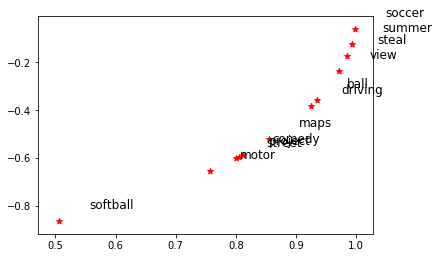

In [16]:
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------
corpus= get_data()
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(corpus)
print(len(word2Ind_co_occurrence.keys()))
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting
words = [
 'softball',
 'street',
 'project',
 'maps',
 'view',
 'summer',
 'ball',
 'steal',
 'soccer',
 'driving',
 'motor',
 'comedy'
]
plot_embeddings(M_normalized, word2Ind_co_occurrence, words)

### YOUR CODE HERE: Answer

In 2-dimensional embedding space, 'comedy', 'project' and street seem to cluster together.
The ideal clustering in the above set would be if 'soccer' and 'softball' were together or close proximity as they are relatable. 'Motor' and 'driving' could have been in closer proximity too.


#raise NotImplementedError()

# Part 2: Prediction-Based Word Vectors (8 points)

As discussed in class, more recently prediction-based word vectors have come into fashion, e.g. word2vec. Here, we shall explore the embeddings produced by word2vec. Please revisit the class notes and lecture slides for more details on the word2vec algorithm. If you're feeling adventurous, challenge yourself and try reading the [original paper].

Then run the following cells to load the word2vec vectors into memory. **Note:** This might take several minutes.

[original paper]: https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf

In [17]:
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 1.2 million embeddings, each lengh 25
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-twitter-25")
    vocab = list(wv_from_bin.vocab.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [18]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This may take several minutes
# -----------------------------------
print ("-" * 80)
print("Warning: Downloading word vectors will take a while")
print ("-" * 80)

wv_from_bin = load_word2vec()

print ("-" * 80)
print("Success!")
print ("-" * 80)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Loaded vocab size 1193514
--------------------------------------------------------------------------------
Success!
--------------------------------------------------------------------------------


**Note: If you are receiving out of memory issues on your local machine, try closing other applications to free more memory on your device. You may want to try restarting your machine so that you can free up extra memory. Then immediately run the jupyter notebook and see if you can load the word vectors properly.**

# Reducing dimensionality of Word2Vec Word Embeddings

Let's directly compare the word2vec embeddings to those of the co-occurrence matrix. Run the following cells to:

1. Put the 3 million word2vec vectors into a matrix M
2. Run reduce_to_k_dim (your Truncated SVD function) to reduce the vectors from 300-dimensional to 2-dimensional.

In [19]:
def get_matrix_of_vectors(wv_from_bin, required_words=['softball', 'technology','street','project','fellow','maps','view','fuel','summer','clubhouse','ball','steal','soccer','driving','motor','comedy']):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 3 million word2vec vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.vocab.keys())
    print("Shuffling words ...")
    random.shuffle(words)
    wrds = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

In [20]:
# -----------------------------------------------------------------
# Run Cell to Reduce 300-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------
M, word2Ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

Shuffling words ...
Putting 1193514 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 1193530 words...
Done.


# Question 2.1: Word2Vec Plot Analysis [written] (4 points)

Run the cell below to plot the 2D word2vec embeddings for ['softball', 'street', 'project', 'maps', 'view', 'fuel',  'summer', 'ball', 'steal', 'soccer', 'driving', 'motor', 'comedy'].

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have? How is the plot different from the one generated earlier from the co-occurrence matrix?

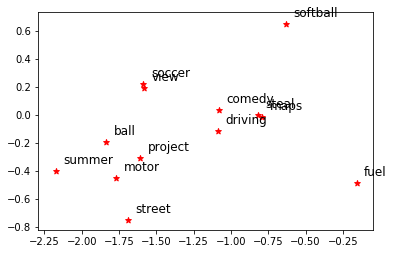

In [21]:
words = [
 'softball',
 'street',
 'project',
 'maps',
 'view',
 'fuel',
 'summer',
 'ball',
 'steal',
 'soccer',
 'driving',
 'motor',
 'comedy'
]
plot_embeddings(M_reduced, word2Ind, words)

###YOUR ANSWER HERE

After running the cell to plot 2D word2vec embeddings for ['softball', 'street', 'project', 'maps', 'view', 'fuel', 'summer', 'ball', 'steal', 'soccer', 'driving', 'motor', 'comedy'], we see that 'maps' and 'steal' cluster together, which should not be the case as they are not correlated at all. The same applies for 'soccer' and 'view'.
However 'soccer' and 'softball' are somewhat in closer proximity than the case before.



# Cosine Similarity

Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective L1 and L2 Distances help quantify the amount of space "we must travel" to get between these two points. Another approach is to examine the angle between two vectors. From trigonometry we know that:

**Insert Image**

Instead of computing the actual angle, we can leave the similarity in terms of  $similarity=cos(Θ)$. Formally the [Cosine Similarity] $s$ between two vectors $p$ and $q$ is defined as:

**Insert Image**

[Cosine Similarity]: https://en.wikipedia.org/wiki/Cosine_similarity

# Question 2.2: Polysemous Words (2 points) [code + written]

Find a polysemous word (for example, "leaves" or "scoop") such that the top-10 most similar words (according to cosine similarity) contains related words from both meanings. For example, "leaves" has both "vanishes" and "stalks" in the top 10, and "scoop" has both "handed_waffle_cone" and "lowdown". You will probably need to try several polysemous words before you find one. Please state the polysemous word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous words you tried didn't work?

**Note:** You should use the wv_from_bin.most_similar(word) function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance please check the [GenSim documentation].

[GenSim documentation]: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar

In [22]:
# YOUR CODE HERE

#wv_from_bin.most_similar("teacher")
wv_from_bin.most_similar("arms")
wv_from_bin.most_similar("crane")
wv_from_bin.most_similar("subject")
wv_from_bin.most_similar("book")

#raise NotImplementedError()

[('books', 0.9418188333511353),
 ('project', 0.9214614629745483),
 ('review', 0.9140495657920837),
 ('script', 0.9069416522979736),
 ('new', 0.9069172143936157),
 ('feature', 0.8995184898376465),
 ('guest', 0.8978615999221802),
 ('read', 0.8931056261062622),
 ('post', 0.8916702270507812),
 ('art', 0.8880470991134644)]

YOUR ANSWER HERE

The polysemous words I tried are:

1. arms = weapons and guns 'or' front limbs of a person

2. crane = a kind of bird 'or' a huge lever machine to lift weights

3. suject = a course 'or' to being faced to

4. book = a collection of information binded together 'or' to reserve for 

T words i tried but the algorithm did not work well is because the source of the data the algorithm is trained on is biased towards more common use cases and some of these words include entertainer, angel, etc
.

# Question 2.3: Synonyms & Antonyms (2 points) [code + written]
When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but Cosine Distance(w1,w3) < Cosine Distance(w1,w2). For example, w1="happy" is closer to w3="sad" than to w2="cheerful".

Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the wv_from_bin.distance(w1, w2) function here in order to compute the cosine distance between two words. Please see the [GenSim documentation] for further assistance.

[GenSim documentation]: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.distance

In [23]:
w1 = "walks"
w2 = "run"
w3 = "ground"
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms walks, run have cosine distance: 0.2741371989250183
Antonyms walks, ground have cosine distance: 0.21394187211990356


###ANSWER

In the given example calculating the Cosine similarity between walks, run and ground:
    
    cos_dist(walks, run) > cos_dist(walks, ground)
    
The word2vec alogrithm uses localized windows to group words together and find context and we don not use synonyms together but the same might not be the case for antonyms. 

In our example, the antonym pair is not very observed together in many corpus.



In [24]:
# YOUR CODE HERE

#wv_from_bin.distance("angel", "demon")
#wv_from_bin.distance("pen", "book")
#wv_from_bin.distance("wood", "would")
wv_from_bin.distance("tall", "height")
#wv_from_bin.distance("might", "may")
                       
#print(a,b,c,d,e)

#raise NotImplementedError()

0.2968660593032837

# Part 3: The Bag of Words Representation

Raw text data as a sequence of words cannot be fed directly to the machine learning algorithms as most of them expect numerical feature vectors with a fixed size rather than the raw text data with variable length.

In order to address this, we need utilities for the most common ways to extract numerical features from text content, namely:

- Tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
- Counting the occurrences of tokens in each document.
- Normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

- Each individual token occurrence frequency (normalized or not) is treated as a feature.
- The vector of all the token frequencies for a given document is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We will call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

The Bag of Words (BOW) representation contrasts with the word embeddings feature representation. In  many cases, this representation provides a simple and interpretable features that can perform just as good as word embeddings.

In the exercises below, you'll implement a standard pipeline for extracting a BOW feature representation for a text categorization task.

## Question 3.1: Tokenization (2 Points)

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation. Here is an example of tokenization:

In [25]:
inpt = ['The quick brown fox jumps over the lazy dog']
output = [['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']]
print('Input: ', inpt)
print('Output: ', output)

Input:  ['The quick brown fox jumps over the lazy dog']
Output:  [['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']]


These tokens are often loosely referred to as terms or words, but it is sometimes important to make a type/token distinction. A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing.

In this section, you're required to implement the "tokenize" function. This function takes as an input a "document" string, and returns a list of tokens tokenized by white spaces. Please refer to the test cases below for some input and output examples.

In [26]:
def tokenize(document):
    # YOUR CODE HERE
    
    tokenized_corpus = document.split()
    #print('tokenized_corpus:', tokenized_corpus)
    
    return tokenized_corpus
    
    #raise NotImplementedError()

In [27]:
corpus = ['This is the first document.', 'This is the second second document.', 'And the third one.', 'Is this the first document?',]
tokenized_corpus = list(map(tokenize, corpus))
print('tokenized_corpus: ', tokenized_corpus)

tokenized_corpus:  [['This', 'is', 'the', 'first', 'document.'], ['This', 'is', 'the', 'second', 'second', 'document.'], ['And', 'the', 'third', 'one.'], ['Is', 'this', 'the', 'first', 'document?']]


In [28]:
# Check that tokenize returns the correct output for several inputs
from unittest import TestCase
test_case = TestCase()
test_case.assertListEqual(tokenize('This is the first document.'), ['This', 'is', 'the', 'first', 'document.'])
test_case.assertListEqual(tokenize('This is the second second document.   '), ['This', 'is', 'the', 'second', 'second', 'document.'])
test_case.assertListEqual(tokenize('And the third one.'), ['And', 'the', 'third', 'one.'])
test_case.assertListEqual(tokenize('Is this the first document?'), ['Is', 'this', 'the', 'first', 'document?'])

In [29]:
# This cell is intentionally left blank

# YOUR CODE HERE
#raise NotImplementedError()

In [30]:
# More hidden test cases are included in this cell


## Question 3.2: Create a Bag of Words Representation (2 Points)

In this section, you're required to implement the "document_to_bag_of_words" function. This function takes as input a tokenized document, and returns a dictionary of counts, mapping every token to the number of times it appeared in the document. Please refer to the test cases below for input and output examples. 

In [31]:
from collections import Counter

def document_to_bag_of_words(tokenized_document):
    # YOUR CODE HERE
    
    word_freq = Counter(tokenized_document)
    
    return word_freq
    
    #raise NotImplementedError()

def corpus_to_bag_of_words(tokenized_corpus):
    return list(map(document_to_bag_of_words, tokenized_corpus))

bag_of_words_corpus = corpus_to_bag_of_words(tokenized_corpus=tokenized_corpus)
print('bag of words corpus: ', bag_of_words_corpus)

bag of words corpus:  [Counter({'This': 1, 'is': 1, 'the': 1, 'first': 1, 'document.': 1}), Counter({'second': 2, 'This': 1, 'is': 1, 'the': 1, 'document.': 1}), Counter({'And': 1, 'the': 1, 'third': 1, 'one.': 1}), Counter({'Is': 1, 'this': 1, 'the': 1, 'first': 1, 'document?': 1})]


In [32]:
# Check that document_to_bag_of_words returns the correct output for different inputs
test_case = TestCase()
test_case.assertCountEqual(document_to_bag_of_words(['This', 'is', 'the', 'first', 'document.']), Counter({'This': 1, 'is': 1, 'the': 1, 'first': 1, 'document.': 1}))
test_case.assertCountEqual(document_to_bag_of_words(['This', 'is', 'the', 'second', 'second', 'document.']), Counter({'second': 2, 'This': 1, 'is': 1, 'the': 1, 'document.': 1}))
test_case.assertCountEqual(document_to_bag_of_words(['And', 'the', 'third', 'one.']), Counter({'And': 1, 'the': 1, 'third': 1, 'one.': 1}))
test_case.assertCountEqual(document_to_bag_of_words(['Is', 'this', 'the', 'first', 'document?']), Counter({'Is': 1, 'this': 1, 'the': 1, 'first': 1, 'document?': 1}))

In [33]:
# This cell in intentionally left blank

# YOUR CODE HERE
#raise NotImplementedError()

In [34]:
# More hidden test cases are included in this cell


## Question 3.3: Create a Bag of N-Grams (2 Points)

In this section, you're required to implement the "document_to_bag_of_n_gram" function. This function takes as input a tokenized document, and the length of N-grams to be extracted. The function returns a dictionary of counts, where the keys represent an N-gram, and the values represent the frequency counts (how many times the N-gram appeared in the document). Please refer to the test cases below for the exact method signature and expected value types. The function returns a dictionary of type "Counter" from the collections module. N-grams are represented as tuples, and frequencies are integer values.

In [35]:
from functools import partial

def document_to_bag_of_n_gram(tokenized_document, n_grams):
    counter = Counter()
    # YOUR CODE HERE
    
    
    x= tuple(tokenized_document)
    y = tuple(x[z:z + 1] for z in range(0, len(x), 1)) 

    
    ngrams_lst = []
    for i in range(0, len(tokenized_document)):
        ngrams_lst.append(tuple(tokenized_document[i:i+n_grams]))
            
    counter = Counter((list(y)+ngrams_lst))   
    

    #raise NotImplementedError()
    return counter

def corpus_to_bag_of_n_gram(tokenized_corpus, n_grams):
    return list(map(partial(document_to_bag_of_n_gram, n_grams=n_grams), tokenized_corpus))

bag_of_bigram_corpus = corpus_to_bag_of_n_gram(tokenized_corpus, n_grams=2)
print('bag of bigram corpus: ', bag_of_bigram_corpus)

bag of bigram corpus:  [Counter({('document.',): 2, ('This',): 1, ('is',): 1, ('the',): 1, ('first',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'first'): 1, ('first', 'document.'): 1}), Counter({('second',): 2, ('document.',): 2, ('This',): 1, ('is',): 1, ('the',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'second'): 1, ('second', 'second'): 1, ('second', 'document.'): 1}), Counter({('one.',): 2, ('And',): 1, ('the',): 1, ('third',): 1, ('And', 'the'): 1, ('the', 'third'): 1, ('third', 'one.'): 1}), Counter({('document?',): 2, ('Is',): 1, ('this',): 1, ('the',): 1, ('first',): 1, ('Is', 'this'): 1, ('this', 'the'): 1, ('the', 'first'): 1, ('first', 'document?'): 1})]


In [36]:
# Check that document_to_bag_of_n_gram returns the correct output for different inputs
test_case = TestCase()
test_case.assertCountEqual(document_to_bag_of_n_gram(['This', 'is', 'the', 'first', 'document.'], n_grams=2), Counter({('This',): 1, ('is',): 1, ('the',): 1, ('first',): 1, ('document.',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'first'): 1, ('first', 'document.'): 1}))
test_case.assertCountEqual(document_to_bag_of_n_gram(['This', 'is', 'the', 'second', 'second', 'document.'], n_grams=2), Counter({('second',): 2, ('This',): 1, ('is',): 1, ('the',): 1, ('document.',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'second'): 1, ('second', 'second'): 1, ('second', 'document.'): 1}))
test_case.assertCountEqual(document_to_bag_of_n_gram(['And', 'the', 'third', 'one.'], n_grams=2),Counter({('And',): 1, ('the',): 1, ('third',): 1, ('one.',): 1, ('And', 'the'): 1, ('the', 'third'): 1, ('third', 'one.'): 1}) )
test_case.assertCountEqual(document_to_bag_of_n_gram(['Is', 'this', 'the', 'first', 'document?'], n_grams=2), Counter({('Is',): 1, ('this',): 1, ('the',): 1, ('first',): 1, ('document?',): 1, ('Is', 'this'): 1, ('this', 'the'): 1, ('the', 'first'): 1, ('first', 'document?'): 1}))

In [37]:
# This cell is intentionally left blank

# YOUR CODE HERE
#raise NotImplementedError()

In [38]:
# More hidden test cases are included in this cell


## Question 3.4: Create the Vocabulary (2 Points)

In this section, you're required to implement the "create_vocabulary" function. This function takes an input a corpus (i.e. a list of bag-of-words dictionary), and returns a vocabulary dictionary mapping each word to a unique integer ID starting from zero. Please use the same order of iterations in the document as in the code snippet below. Again, you can refer to the test cases below for more concrete examples.

In [39]:
# Return a dictionary that maps tokens to integer id, please use the given order of iterations, and assign unique 
# sequential integer IDS starting from 0
def create_vocabulary(corpus):
    vocab = {}
    x=0
    z = []
    
    for document in corpus:
        for token in document:
            # YOUR CODE HERE
        
            z.append(token) 
            z = list(dict.fromkeys(z)) 
   
    for i in z:
        x +=1
        vocab.update({i:x-1}) 
        
    #print(z)        
    print(vocab)
  
            
            
            #raise NotImplementedError()
    return vocab

vocab = create_vocabulary(corpus=bag_of_bigram_corpus)
print('vocab: ', vocab)

{('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24}
vocab:  {('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24}


In [40]:
test_case = TestCase()
bag_of_bigram_corpus = [Counter({('This',): 1, ('is',): 1, ('the',): 1, ('first',): 1, ('document.',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'first'): 1, ('first', 'document.'): 1}), Counter({('second',): 2, ('This',): 1, ('is',): 1, ('the',): 1, ('document.',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'second'): 1, ('second', 'second'): 1, ('second', 'document.'): 1}), Counter({('And',): 1, ('the',): 1, ('third',): 1, ('one.',): 1, ('And', 'the'): 1, ('the', 'third'): 1, ('third', 'one.'): 1}), Counter({('Is',): 1, ('this',): 1, ('the',): 1, ('first',): 1, ('document?',): 1, ('Is', 'this'): 1, ('this', 'the'): 1, ('the', 'first'): 1, ('first', 'document?'): 1})]
test_case.assertDictEqual(create_vocabulary(bag_of_bigram_corpus), {('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24})

{('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24}


In [41]:
# More hidden test cases are included in this cell


## Question 3.5: Numericalize the Corpus (2 Points)

In this section, you're required to implement the "numericalize_document" function. This function takes as input a document (a bag-of-words Counter), and a vocabulary dictionary (a dictionary from words to IDs), and returns a numeric representation for the document, where each word in the bag is replaced with it's numeric ID from the vocabulary. Please refer to the test cases below for some input and output examples.

In [42]:
def numericalize_document(document, vocab):
    numeric_counter = Counter()
    
    # YOUR CODE HERE
    
    z={}
    
    for value in document:
        i = vocab[value]
        z.update({i:document[value]})
        
    numeric_counter = z
    
    #raise NotImplementedError()
    return numeric_counter

def numericalize_corpus(bag_of_bigram_corpus, vocab):    
    return list(map(partial(numericalize_document, vocab=vocab), bag_of_bigram_corpus))

print('vocab: ', vocab)
numeric_corpus = numericalize_corpus(bag_of_bigram_corpus=bag_of_bigram_corpus, vocab=vocab)
print('numeric_corpus: ', numeric_corpus)

vocab:  {('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24}
numeric_corpus:  [{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}, {9: 2, 0: 1, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 10: 1, 11: 1, 12: 1}, {13: 1, 2: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1}, {19: 1, 20: 1, 2: 1, 3: 1, 21: 1, 22: 1, 23: 1, 7: 1, 24: 1}]


In [43]:
test_case = TestCase()
vocab = {('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24}
document = Counter({('This',): 1, ('is',): 1, ('the',): 1, ('first',): 1, ('document.',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'first'): 1, ('first', 'document.'): 1})
numeric_document = numericalize_document(document=document, vocab=vocab)
test_case.assertCountEqual(numeric_document, Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}))
document = Counter({('second',): 2, ('This',): 1, ('is',): 1, ('the',): 1, ('document.',): 1, ('This', 'is'): 1, ('is', 'the'): 1, ('the', 'second'): 1, ('second', 'second'): 1, ('second', 'document.'): 1})
numeric_document = numericalize_document(document=document, vocab=vocab)
test_case.assertCountEqual(numeric_document, Counter({9: 2, 0: 1, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 10: 1, 11: 1, 12: 1}))
document = Counter({('And',): 1, ('the',): 1, ('third',): 1, ('one.',): 1, ('And', 'the'): 1, ('the', 'third'): 1, ('third', 'one.'): 1})
numeric_document = numericalize_document(document=document, vocab=vocab)
test_case.assertCountEqual(numeric_document, Counter({13: 1, 2: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1}))
document = Counter({('Is',): 1, ('this',): 1, ('the',): 1, ('first',): 1, ('document?',): 1, ('Is', 'this'): 1, ('this', 'the'): 1, ('the', 'first'): 1, ('first', 'document?'): 1})
numeric_document = numericalize_document(document=document, vocab=vocab)
test_case.assertCountEqual(numeric_document, Counter({19: 1, 20: 1, 2: 1, 3: 1, 21: 1, 22: 1, 23: 1, 7: 1, 24: 1}))

In [44]:
# More hidden test cases are included in this cell


## Question 3.6: Vectorize the Corpus (2 Points)

In this section, you're required to implement the "vectorize_document" function. This function takes as input a numeric document and a vocabulary, and returns a vectorized feature representation for the document. The function returns a vector of dimension $|V|$, the number of words in the vocabulary. The value of each entry in the vector is the frequency of occurance of the corresponding vocabulary word in the document. Please refer to the test cases for more detailed examples. This concludes the BOW feature extraction pipeline.

In [45]:
import numpy as np

def vectorize_document(numeric_document, vocab):
    vocab_size = len(vocab)
    document_vector = np.zeros(vocab_size)
    # YOUR CODE HERE
    
    arr = []
    
    for i in numeric_document:
        document_vector[i]=numeric_document[i]
    
    #raise NotImplementedError()
    return document_vector

def vectorize_corpus(numeric_corpus, vocab):
    return np.array(list(map(partial(vectorize_document, vocab=vocab), numeric_corpus)))

vectorized_corpus = vectorize_corpus(numeric_corpus=numeric_corpus, vocab=vocab)
print('vectorized_corpus: ', repr(vectorized_corpus))

vectorized_corpus:  array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1., 1., 0., 0., 2., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1.]])


In [46]:
from numpy.testing import assert_array_equal
vocab = {('This',): 0, ('is',): 1, ('the',): 2, ('first',): 3, ('document.',): 4, ('This', 'is'): 5, ('is', 'the'): 6, ('the', 'first'): 7, ('first', 'document.'): 8, ('second',): 9, ('the', 'second'): 10, ('second', 'second'): 11, ('second', 'document.'): 12, ('And',): 13, ('third',): 14, ('one.',): 15, ('And', 'the'): 16, ('the', 'third'): 17, ('third', 'one.'): 18, ('Is',): 19, ('this',): 20, ('document?',): 21, ('Is', 'this'): 22, ('this', 'the'): 23, ('first', 'document?'): 24}
document = Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
assert_array_equal(vectorize_document(numeric_document=document, vocab=vocab), [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
document = Counter({9: 2, 0: 1, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 10: 1, 11: 1, 12: 1})
assert_array_equal(vectorize_document(numeric_document=document, vocab=vocab), [1., 1., 1., 0., 1., 1., 1., 0., 0., 2., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
document = Counter({13: 1, 2: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1})
assert_array_equal(vectorize_document(numeric_document=document, vocab=vocab), [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0.])
document = Counter({19: 1, 20: 1, 2: 1, 3: 1, 21: 1, 22: 1, 23: 1, 7: 1, 24: 1})
assert_array_equal(vectorize_document(numeric_document=document, vocab=vocab), [0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [47]:
# More hidden test cases are included in this cell


## Part 4: Text Classification

In this section, we'll compare two different approaches for feature representation on a text classification task. We'll compare models trained with the BOW feture representation (Part 3) and the word embeddings represntation (Part 2) on the task of text classification for The AG_NEWS dataset. The AG_News dataset has four labels and therefore the number of classes is four.

1. World
2. Sports
3. Business
4. Sci/Tec

The cells below will load the dataset using the torchtext module, and split the test split into 50% for validation and 50% for testing. The torchtext module loads the data in a numeric form, where each token is replaced with an Integer ID, additionaly, we store the data in a raw text format by mapping these integer IDs back to the original tokens (see the train_corpus, and test_corpus variables).

In [48]:
import os
import torch
import torchtext
from torchtext.datasets import text_classification
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data.dataset import random_split
from torchtext.data.utils import get_tokenizer
import io
import numpy as np
from torchtext.utils import unicode_csv_reader
from torchtext.data.utils import ngrams_iterator
from torchtext.vocab import Vocab
from torchtext.datasets.text_classification import TextClassificationDataset

# Fix random-seed for reproducability 
np.random.seed(31415)
torch.manual_seed(0)

def _csv_iterator(data_path, ngrams, yield_cls=False):
    tokenizer = get_tokenizer("basic_english")
    with io.open(data_path, encoding="utf8") as f:
        reader = unicode_csv_reader(f)
        for row in reader:
            tokens = ' '.join(row[1:])
            tokens = tokenizer(tokens)
            if yield_cls:
                yield int(row[0]) - 1, ngrams_iterator(tokens, ngrams)
            else:
                yield ngrams_iterator(tokens, ngrams)

def _create_data_from_iterator(vocab, iterator, include_unk):
    data = []
    labels = []
    for cls, tokens in iterator:
        if include_unk:
            tokens = torch.tensor([vocab[token] for token in tokens])
        else:
            token_ids = list(filter(lambda x: x is not Vocab.UNK, [vocab[token]
                                    for token in tokens]))
            tokens = torch.tensor(token_ids)
        if len(tokens) == 0:
            logging.info('Row contains no tokens.')
        data.append((cls, tokens))
        labels.append(cls)
    return data, set(labels)
                
def setup_datasets(train_csv_path, test_csv_path, ngrams=2, include_unk=False):
    print('Building Vocab based on {}'.format(train_csv_path))
    vocab = build_vocab_from_iterator(_csv_iterator(train_csv_path, ngrams))
    print('Vocab has {} entries'.format(len(vocab)))
    print('Creating training data')
    train_data, train_labels = _create_data_from_iterator(
        vocab, _csv_iterator(train_csv_path, ngrams, yield_cls=True), include_unk)
    print('Creating testing data')
    test_data, test_labels = _create_data_from_iterator(
        vocab, _csv_iterator(test_csv_path, ngrams, yield_cls=True), include_unk)
    if len(train_labels ^ test_labels) > 0:
        raise ValueError("Training and test labels don't match")
    return (TextClassificationDataset(vocab, train_data, train_labels),
            TextClassificationDataset(vocab, test_data, test_labels))


train_dataset, test_dataset = setup_datasets(train_csv_path='ag_news/train.csv', test_csv_path='ag_news/test.csv',ngrams=1)

# Cut some of the data
print(len(train_dataset))
print(len(test_dataset))

test_len = int(len(test_dataset) * 0.5)
test_dataset, valid_dataset = \
    random_split(test_dataset, [test_len, len(test_dataset) - test_len])

Building Vocab based on ag_news/train.csv


10000lines [00:00, 10004.61lines/s]


Vocab has 29292 entries
Creating training data
Creating testing data
10000
7600


In [49]:
type(train_dataset[0][1])
vocab = train_dataset.get_vocab()
print('vocab size: ', len(vocab))
itos = vocab.itos
print('creating corpus...')
train_corpus = [' '.join([itos[token] for token in sample[1]]) for sample in train_dataset]
train_targets = [sample[0] for sample in train_dataset]
test_corpus = [' '.join([itos[token] for token in sample[1]])for sample in test_dataset]
test_targets = [sample[0] for sample in test_dataset]
print('done creating training / testing corpus!')

vocab size:  29292
creating corpus...
done creating training / testing corpus!


## Linear Classification Model with BOW representation

After loading the dataset, we'll first experiment with training a linear model trained on a BOW feature representation. We can use the feature extraction pipeline we implemented in Part 3 for this task, however, since the vocabulary of the AG-News dataset is much larger, it's better to use the tools from the Sklearn package to handle the BOW feature extraction part, as it supports sparse data structures that's much more memory efficient than our implementation in Part 3.

The cell below trains two classification models. A bag-of-unigram model trained only on unigram features, and a bag-of-bi-grams model that includes bi-gram features as well. Both of these  are linear logistic regression models. The CountVectorizer object extracts the BOW features and computes the vocabulary, and the LogisticRegression classifier is then trained on top of this feature representation.


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

min_df = 10
print('Training a uni-gram model..')
text_clf = Pipeline([('vect', CountVectorizer(min_df=min_df)), ('clf', LogisticRegression(solver='lbfgs', multi_class='auto')),])
text_clf.fit(train_corpus, train_targets)  
predicted = text_clf.predict(test_corpus)
print('Accuracy:', np.mean(predicted == test_targets))     

print('Training a bi-gram model...')
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=min_df)), ('clf', LogisticRegression(solver='lbfgs', multi_class='auto')),])
text_clf.fit(train_corpus, train_targets)  
predicted = text_clf.predict(test_corpus)
print('Accuracy: ', np.mean(predicted == test_targets))

Training a uni-gram model..


C:\Users\evars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 0.8581578947368421
Training a bi-gram model...


C:\Users\evars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy:  0.861578947368421


We can see that the bi-gram model outperforms the uni-gram model. The accuracy of the uni-gram model on the test split is 85.81%, which is outperformed by the 86.16% accuracy from the bi-gram model.

## Question 4.1: Feature Importance (2 Points)

One advantage of using a BOW representation with a linear logistic regression model is that we can easily interpret the importance of difference features for the classification task. One way of doing this is by examining the weights of the learned model, and identifying which of these weights were assigned a higher value. 

You're required to implement the "get_feature_importance" function below. The function takes as input the trained Sklearn pipeline from the previous cell, together with a Class ID (class_id) representing the class ID we want to study. The function returns a list of the most important ten features. The feature importance part is already pre-computed in the code snippet below, you're required to sort these importance list in assending order, map the features back to the original text representation, and return a list of most important ten features sorted in ascending order. Please refer to the test cases below for some examples.

In [51]:
def get_feature_importance(pipeline, class_id):
    classifier = pipeline['clf']
    vectorizer = pipeline['vect']
    weights = abs(classifier.coef_[class_id])
    feature_importance = 100.0 * (weights / weights.max())
    feat_map = []
    # YOUR CODE HERE
    
    print(len(feature_importance))
    
    new = dict([[i,j] for j,i in vectorizer.vocabulary_.items()])
    
    feat_imp = sorted(feature_importance, reverse=True)
    feat_imp = (feat_imp[0:10])
    feat_imp.reverse()

    for value in feat_imp:
        feat_map.append(new[np.where(feature_importance == value)[0][0]])
    #print(new)
    return feat_map
    #raise NotImplementedError()
    
print('Feature sorted by importance: ')
print(get_feature_importance(pipeline=text_clf, class_id=0))

Feature sorted by importance: 
7656
['killed', 'game', 'leader', 'iraq', 'indonesia', 'peace', 'capital', 'nuclear', 'iraqi', 'party']


In [52]:
test_case = TestCase()
test_case.assertListEqual(get_feature_importance(pipeline=text_clf, class_id=0), ['killed', 'game', 'leader', 'iraq', 'indonesia', 'peace', 'capital', 'nuclear', 'iraqi', 'party'])
test_case.assertListEqual(get_feature_importance(pipeline=text_clf, class_id=1), ['manager', 'players', 'sports', 'teams', 'team', 'olympic', 'baseball', 'football', 'coach', 'cup'])

7656
7656


In [53]:
# More hidden test cases are included in this cell


# Question 4.2: Word Embeddings + Linear Neural Model (2 Points)

We now experiment with the word embeddings feature representation (Part 2) using two different neural model architectures. We start with a linear model in this section, and then experiment with a deeper model architecture in the following section.

You're required to update the "fc" variable below to include a linear layer instead of the null value. The linear model should have input dimension of size "embed_dim", and an output dimension of size "num_class".

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearAverageEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = None
        # YOUR CODE HERE
        
        self.fc = nn.Linear(embed_dim, num_class)
        
        #raise NotImplementedError()
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [55]:
test_case = TestCase()
model = LinearAverageEmbeddingModel(vocab_size=10, embed_dim=25, num_class=4)
number_of_parameters =  sum(p.numel() for p in model.parameters())
test_case.assertEqual(number_of_parameters, 354)
model = LinearAverageEmbeddingModel(vocab_size=105, embed_dim=300, num_class=2)
number_of_parameters =  sum(p.numel() for p in model.parameters())
test_case.assertEqual(number_of_parameters, 32102)

In [56]:
# More hidden test cases are included in this cell


The cells below provide some utility function for traning the neural model. We use a batch size of 16, an embedding dimension of size 300, and we train for 5 epochs.

In [57]:
VOCAB_SIZE = len(train_dataset.get_vocab())
EMBED_DIM = 300
NUM_CLASS = len(train_dataset.get_labels())
print('Number of classes: ', NUM_CLASS)
print('Labels: ', train_dataset.get_labels())

Number of classes:  4
Labels:  {0, 1, 2, 3}


In [58]:
def generate_batch(batch):
    label = torch.tensor([entry[0] for entry in batch])
    text = [entry[1] for entry in batch]
    offsets = [0] + [len(entry) for entry in text]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text = torch.cat(text)
    return text, offsets, label

In [59]:
from torch.utils.data import DataLoader

def train_func(sub_train_, model, optimizer, scheduler, criterion, batch_size):
    # Train the model
    train_loss = 0
    train_acc = 0
    data = DataLoader(sub_train_, batch_size=batch_size, shuffle=True,
                      collate_fn=generate_batch)
    for i, (text, offsets, cls) in enumerate(data):
        optimizer.zero_grad()
        text, offsets, cls = text.to(device), offsets.to(device), cls.to(device)
        output = model(text, offsets)
        loss = criterion(output, cls)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        train_acc += (output.argmax(1) == cls).sum().item()        
    # Adjust the learning rate
    scheduler.step()
    
    return train_loss / len(sub_train_), train_acc / len(sub_train_)

def test(data_, model, batch_size, criterion):
    loss = 0
    acc = 0
    data = DataLoader(data_, batch_size=batch_size, collate_fn=generate_batch)
    for text, offsets, cls in data:
        text, offsets, cls = text.to(device), offsets.to(device), cls.to(device)
        with torch.no_grad():
            output = model(text, offsets)
            loss = criterion(output, cls)
            loss += loss.item()
            acc += (output.argmax(1) == cls).sum().item()

    return loss / len(data_), acc / len(data_)

In [60]:
import torchtext
from torchtext.datasets import text_classification
NGRAMS = 1
import os
# Always using a CPU for reproducability 
device = torch.device('cpu')

In [61]:
import time
import random 

def seed_everything(seed=1234):                                                  
   random.seed(seed)                                                            
   torch.manual_seed(seed)                                                      
   torch.cuda.manual_seed_all(seed)                                             
   np.random.seed(seed)                                                         
   os.environ['PYTHONHASHSEED'] = str(seed)                                     
   torch.backends.cudnn.deterministic = True                                    
   torch.backends.cudnn.benchmark = False

def train_model(model, lr, n_epochs, batch_size, ):
    print('model: ')
    print(model)
    min_valid_loss = float('inf')

    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.9)

    print('Epoch: 0')
    train_loss, train_acc = test(train_dataset, model=model, batch_size=batch_size, criterion=criterion)
    valid_loss, valid_acc = test(valid_dataset, model=model, batch_size=batch_size, criterion=criterion)
    test_loss, test_acc = test(test_dataset, model=model, batch_size=batch_size, criterion=criterion)
    print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
    print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')
    print(f'\tLoss: { test_loss:.4f}(test)\t|\tAcc: { test_acc * 100:.1f}%(test)')

    for epoch in range(n_epochs):
        start_time = time.time()
        train_loss, train_acc = train_func(train_dataset, model=model, optimizer=optimizer, scheduler=scheduler, 
                                           criterion=criterion, batch_size=batch_size)
        valid_loss, valid_acc = test(valid_dataset, model=model, batch_size=batch_size, criterion=criterion)

        secs = int(time.time() - start_time)
        mins = secs / 60
        secs = secs % 60

        print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
        print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
        print(f'\tLoss: {valid_loss:.4f}(valid)\t|\tAcc: {valid_acc * 100:.1f}%(valid)')
        
    test_loss, test_acc = test(test_dataset, model=model, batch_size=batch_size, criterion=criterion)
    print(f'\tLoss: { test_loss:.4f}(test)\t|\tAcc: { test_acc * 100:.1f}%(test)')
    return test_acc

seed_everything()
linear_model = LinearAverageEmbeddingModel(VOCAB_SIZE, EMBED_DIM, NUM_CLASS).to(device)
train_model(model=linear_model, lr=4, n_epochs=5, batch_size=16)

model: 
LinearAverageEmbeddingModel(
  (embedding): EmbeddingBag(29292, 300, mode=mean)
  (fc): Linear(in_features=300, out_features=4, bias=True)
)
Epoch: 0
	Loss: 0.0003(train)	|	Acc: 26.7%(train)
	Loss: 0.0008(valid)	|	Acc: 25.9%(valid)
	Loss: 0.0008(test)	|	Acc: 27.2%(test)
Epoch: 1  | time in 0 minutes, 6 seconds
	Loss: 0.0455(train)	|	Acc: 71.6%(train)
	Loss: 0.0003(valid)	|	Acc: 80.1%(valid)
Epoch: 2  | time in 0 minutes, 5 seconds
	Loss: 0.0209(train)	|	Acc: 88.5%(train)
	Loss: 0.0003(valid)	|	Acc: 82.6%(valid)
Epoch: 3  | time in 0 minutes, 5 seconds
	Loss: 0.0134(train)	|	Acc: 93.2%(train)
	Loss: 0.0001(valid)	|	Acc: 85.8%(valid)
Epoch: 4  | time in 0 minutes, 5 seconds
	Loss: 0.0085(train)	|	Acc: 95.7%(train)
	Loss: 0.0001(valid)	|	Acc: 86.4%(valid)
Epoch: 5  | time in 0 minutes, 5 seconds
	Loss: 0.0057(train)	|	Acc: 97.5%(train)
	Loss: 0.0001(valid)	|	Acc: 86.2%(valid)
	Loss: 0.0001(test)	|	Acc: 86.6%(test)


0.8655263157894737

# Question 4.3: Deep Averaging Network (DAN) Model (2 Points)

We now experiment with a deeper model architecture. In this section we'll implement a Deep Average Network (DAN). In contrast to the previous neural model that used only a single linear layer, the DAN model will have two linear layers: fc, and fc_2. The first linear layer (fc) will take an input of size embed_dim, and outputs a representation of size hidden_dim. The second linear layer will take an input of size hidden_dim, and map it to an ouput of size num_class. 

You're required to update the fc, fc_2 and embedding attributes in the code snippet blow to match the model description in the paragraph above.

In [62]:
class DanModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_class):
        super().__init__()
        self.embedding = None
        self.fc = None
        self.fc_2 = None
        # YOUR CODE HERE
        
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, num_class)
        
        #raise NotImplementedError()
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
        self.fc_2.weight.data.uniform_(-initrange, initrange)
        self.fc_2.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        linear_1_output = self.fc(embedded)
        activation_output = F.relu(linear_1_output)
        return self.fc_2(activation_output)

In [63]:
test_case = TestCase()
model = DanModel(vocab_size=5, embed_dim=300, hidden_dim=10, num_class=4)
number_of_parameters =  sum(p.numel() for p in model.parameters())
test_case.assertEqual(number_of_parameters, 4554)
model = DanModel(vocab_size=8372, embed_dim=25, hidden_dim=15, num_class=2)
number_of_parameters =  sum(p.numel() for p in model.parameters())
test_case.assertEqual(number_of_parameters, 209722)

In [64]:
# More hidden test cases are included in this cell


In [65]:
import time
HIDDEN_DIM = 100
min_valid_loss = float('inf')

seed_everything()
dan_model = DanModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, NUM_CLASS).to(device)
train_model(model=dan_model, lr=2.0, n_epochs=5, batch_size=16)

model: 
DanModel(
  (embedding): EmbeddingBag(29292, 300, mode=mean)
  (fc): Linear(in_features=300, out_features=100, bias=True)
  (fc_2): Linear(in_features=100, out_features=4, bias=True)
)
Epoch: 0
	Loss: 0.0003(train)	|	Acc: 24.3%(train)
	Loss: 0.0007(valid)	|	Acc: 23.2%(valid)
	Loss: 0.0007(test)	|	Acc: 22.9%(test)
Epoch: 1  | time in 0 minutes, 6 seconds
	Loss: 0.0713(train)	|	Acc: 51.8%(train)
	Loss: 0.0005(valid)	|	Acc: 67.0%(valid)
Epoch: 2  | time in 0 minutes, 6 seconds
	Loss: 0.0339(train)	|	Acc: 80.5%(train)
	Loss: 0.0004(valid)	|	Acc: 82.2%(valid)
Epoch: 3  | time in 0 minutes, 7 seconds
	Loss: 0.0221(train)	|	Acc: 87.4%(train)
	Loss: 0.0004(valid)	|	Acc: 84.5%(valid)
Epoch: 4  | time in 0 minutes, 5 seconds
	Loss: 0.0152(train)	|	Acc: 91.4%(train)
	Loss: 0.0002(valid)	|	Acc: 83.9%(valid)
Epoch: 5  | time in 0 minutes, 6 seconds
	Loss: 0.0094(train)	|	Acc: 94.5%(train)
	Loss: 0.0004(valid)	|	Acc: 83.1%(valid)
	Loss: 0.0003(test)	|	Acc: 83.1%(test)


0.8313157894736842

## Question 4.4: Statistical Significance Testing (2 Points)

We now use the McNemar’s test to compare the two Machine learning classifier we've trained: the BoW model with bi-gram features, and the Deep Averaging Network (DAN) model. The test determines if the DAN model yields statistically significant differences to the vanilla BOW representation (see eg http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.37.3325, https://machinelearningmastery.com/mcnemars-test-for-machine-learning/)

You're required to implement the "compute_contingency_table" function. This function takes as input prediction from the BOW model and the DAN neural model, and returns the contingency table for these predictions. Please return a 2D 2x2 numpy array, where rows correspond to BOW predictions, and columns correspond to the neural predictions.

In [66]:
import scipy
from statsmodels.stats.contingency_tables import mcnemar

def compute_contingency_table(bow_prediction, neural_prediction):
    # YOUR CODE HERE
    
    #print(len(bow_prediction))
    #print(len(neural_prediction))
    
    
    z = (len(set(neural_prediction)))
    
    contingency_table = np.zeros((z, z))
    
    for i in range(0, len(bow_prediction)):
        contingency_table[neural_prediction[i]][bow_prediction[i]] = contingency_table[neural_prediction[i]][bow_prediction[i]]+1 #1
    
    
    return(contingency_table.T)
    #raise NotImplementedError()
    
def compute_statistic(bow_model, neural_model, test_data, test_corpus):
    bow_prediction = text_clf.predict(test_corpus)    
    data = DataLoader(test_data, batch_size=len(test_data), collate_fn=generate_batch)
    assert len(data) == 1
    text, offsets, cls = list(data)[0]
    text, offsets, cls = text.to(device), offsets.to(device), cls.to(device)
    with torch.no_grad():
        output = neural_model(text, offsets)
        neural_prediction = output.argmax(axis=1).numpy()
    contingency_table = compute_contingency_table(bow_prediction=bow_prediction, neural_prediction=neural_prediction)
    print('contingency_table: ')
    print(contingency_table)
    print(contingency_table.shape)
    result = mcnemar(contingency_table)
    alpha = 0.05
    if result.pvalue > alpha:
        print('Same proportions of errors (fail to reject H0)')
    else:
        print('Different proportions of errors (reject H0)')
    
compute_statistic(bow_model=text_clf, neural_model=dan_model, test_data=test_dataset, test_corpus=test_corpus)

contingency_table: 
[[913.  13.  35.   2.]
 [ 54. 911.   5.   0.]
 [ 55.  19. 812.  31.]
 [107.  51. 135. 657.]]
(4, 4)
Different proportions of errors (reject H0)


In [67]:
from numpy.testing import assert_array_equal

contingency_table = compute_contingency_table(np.array([0, 1]), np.array([1, 0]))
truth =  [[0, 1], [1, 0]]
assert_array_equal(contingency_table, truth)
contingency_table = compute_contingency_table(np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]), np.array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]))
truth = [[3, 3], [1, 4]]
assert_array_equal(contingency_table, truth)

In [68]:
# More hidden test cases are included in this cell
